In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from IPython.display import display
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [272]:
# 导入数据
data = pd.read_csv('house_price.csv')
data.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [273]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [274]:
# 查看数据缺失情况
data.isnull().sum().sort_values(ascending=False)

Elevator      8237
Year             0
Size             0
Renovation       0
Region           0
Price            0
Layout           0
Id               0
Garden           0
Floor            0
District         0
Direction        0
dtype: int64

In [275]:
# 查看统计信息
data.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [276]:
# 1、id没有实际意义，所以将其移除
print('删除Id前，数据的shape：',data.shape)
data = data.drop(['Id'], axis=1)
print('删除Id后，数据的shape：',data.shape)

删除Id前，数据的shape： (23677, 12)
删除Id后，数据的shape： (23677, 11)


In [277]:
# 2、添加房屋的均价
df = data.copy()
df['PerPrice'] = data['Price']/data['Size']
print(df.shape)
df.head()

(23677, 12)


,Direction,District,Elevator,Floor,Garden,Layout,Price,Region,Renovation,Size,Year,PerPrice
0,东西,灯市口,NaN,6,锡拉胡同21号院,3室1厅,780.0,东城,精装,75.0,1988,10.400000
1,南北,东单,无电梯,6,东华门大街,2室1厅,705.0,东城,精装,60.0,1988,11.750000
2,南西,崇文门,有电梯,16,新世界中心,3室1厅,1400.0,东城,其他,210.0,1996,6.666667
3,南,崇文门,NaN,7,兴隆都市馨园,1室1厅,420.0,东城,精装,39.0,2004,10.769231
4,南,陶然亭,有电梯,19,中海紫御公馆,2室2厅,998.0,东城,精装,90.0,2010,11.088889


# 对每个特征做进一步的分析

## 1、Size特征

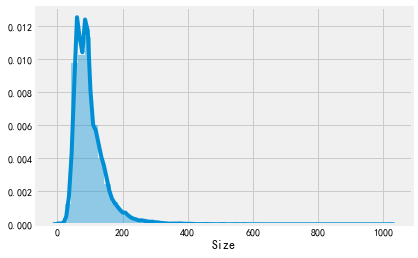

In [279]:
# 观察size特征
sns.distplot(df['Size'])  #绘制直方图

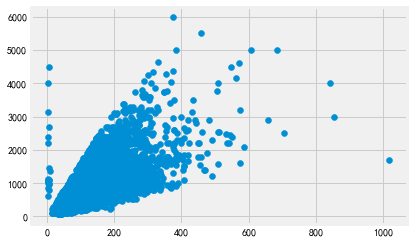

In [280]:
# size与price的关系
plt.scatter(df['Size'], df['Price'])

In [281]:
df.loc[df['Size']<10]

,Direction,District,Elevator,Floor,Garden,Layout,Price,Region,Renovation,Size,Year,PerPrice
1168,240.97平米,长阳,毛坯,5,世茂维拉,叠拼别墅,1080.0,房山,南北,5.0,2015,216.000000
1458,242.78平米,长阳,毛坯,5,世茂维拉,叠拼别墅,1100.0,房山,南北,5.0,2015,220.000000
1797,242.96平米,长阳,精装,5,世茂维拉,叠拼别墅,980.0,房山,南北,5.0,2015,196.000000
2268,295.88平米,顺义其它,精装,4,龙湖好望山,叠拼别墅,1000.0,顺义,南北,4.0,2014,250.000000
2274,295.01平米,顺义其它,精装,4,鹭峯国际,叠拼别墅,1450.0,顺义,南北,5.0,2014,290.000000
2276,292.31平米,顺义其它,毛坯,3,龙湖好望山,叠拼别墅,860.0,顺义,南北,4.0,2014,215.000000
2432,294.42平米,顺义其它,精装,5,龙湖好望山,叠拼别墅,980.0,顺义,南北,6.0,2013,163.333333
4078,427.5平米,西红门,精装,3,鸿坤林语墅,叠拼别墅,3150.0,大兴,南北,4.0,2015,787.500000
4079,361.8平米,西红门,精装,4,鸿坤林语墅,叠拼别墅,2380.0,大兴,南北,4.0,2015,595.000000
4761,386.83平米,西红门,精装,3,鸿坤林语墅,叠拼别墅,2700.0,大兴,南北,5.0,2015,540.000000


In [282]:
len(df.loc[df['Size']<10])

20

In [283]:
df.loc[df['Size']>1000]

,Direction,District,Elevator,Floor,Garden,Layout,Price,Region,Renovation,Size,Year,PerPrice
8754,南,通州其它,有电梯,8,新华联科技大厦,1房间0卫,1700.0,通州,简装,1019.0,2009,1.668302


In [284]:
print(df.shape)
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]
print(df.shape)

(23677, 12)
(23656, 12)


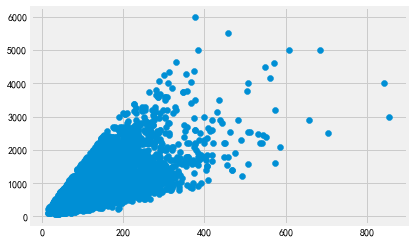

In [285]:
# 再来观察size与price的关系
plt.scatter(df['Size'], df['Price'])

## 2、Layout特征

In [286]:
# 查看Layout特征分布
df['Layout'].value_counts()

2室1厅      9485
3室1厅      3999
3室2厅      2765
1室1厅      2681
2室2厅      1671
4室2厅       930
1室0厅       499
4室1厅       295
5室2厅       200
2房间1卫      170
1房间1卫      146
3房间1卫      116
4室3厅        96
5室3厅        75
1室2厅        67
6室2厅        59
3房间2卫       53
2室0厅        50
3室3厅        43
4房间2卫       31
3室0厅        29
6室3厅        29
5室1厅        27
2房间2卫       18
4房间1卫       15
1房间0卫       14
5房间2卫       10
4房间3卫        7
7室3厅         7
7室2厅         6
5房间3卫        6
2室3厅         5
4室4厅         4
8室3厅         4
6室4厅         4
5室4厅         4
6房间4卫        3
4室0厅         3
8室2厅         3
3房间0卫        3
2房间0卫        2
1房间2卫        2
6室0厅         2
6房间3卫        2
3房间3卫        2
9室3厅         1
7房间2卫        1
1室3厅         1
6室1厅         1
6室5厅         1
7室1厅         1
5室0厅         1
5房间0卫        1
8室5厅         1
8室4厅         1
9室1厅         1
6房间5卫        1
11房间3卫       1
9室2厅         1
Name: Layout, dtype: int64

In [287]:
# 提取室和厅重新创建特征
# 先将房间都替换为室
df['Layout'] = df['Layout'].apply(lambda x:x.replace('房间','室'))
print(df['Layout'].value_counts())
print(df.shape)

2室1厅     9485
3室1厅     3999
3室2厅     2765
1室1厅     2681
2室2厅     1671
4室2厅      930
1室0厅      499
4室1厅      295
5室2厅      200
2室1卫      170
1室1卫      146
3室1卫      116
4室3厅       96
5室3厅       75
1室2厅       67
6室2厅       59
3室2卫       53
2室0厅       50
3室3厅       43
4室2卫       31
3室0厅       29
6室3厅       29
5室1厅       27
2室2卫       18
4室1卫       15
1室0卫       14
5室2卫       10
4室3卫        7
7室3厅        7
7室2厅        6
5室3卫        6
2室3厅        5
5室4厅        4
6室4厅        4
4室4厅        4
8室3厅        4
4室0厅        3
6室4卫        3
8室2厅        3
3室0卫        3
2室0卫        2
6室3卫        2
6室0厅        2
3室3卫        2
1室2卫        2
7室1厅        1
7室2卫        1
5室0卫        1
5室0厅        1
9室1厅        1
11室3卫       1
6室5卫        1
8室4厅        1
8室5厅        1
9室3厅        1
6室5厅        1
6室1厅        1
1室3厅        1
9室2厅        1
Name: Layout, dtype: int64
(23656, 12)


In [288]:
# 创建室为新的特征
df['室'] = df['Layout'].apply(lambda x:x.split('室')[0])
print(df.shape)
df = df.drop(['Layout'], axis=1)
print(df['室'].value_counts())

(23656, 13)
2     11401
3      7010
1      3410
4      1381
5       324
6       102
7        15
8         9
9         3
11        1
Name: 室, dtype: int64


In [289]:
# 将房间数>6的样本删除
df['室'] = df['室'].apply(int)
df = df.loc[df['室']<=6]
print(df.shape)
print(df['室'].value_counts())

(23628, 12)
2    11401
3     7010
1     3410
4     1381
5      324
6      102
Name: 室, dtype: int64


## 3.Region特征

In [290]:
df.head()

,Direction,District,Elevator,Floor,Garden,Price,Region,Renovation,Size,Year,PerPrice,室
0,东西,灯市口,NaN,6,锡拉胡同21号院,780.0,东城,精装,75.0,1988,10.400000,3
1,南北,东单,无电梯,6,东华门大街,705.0,东城,精装,60.0,1988,11.750000,2
2,南西,崇文门,有电梯,16,新世界中心,1400.0,东城,其他,210.0,1996,6.666667,3
3,南,崇文门,NaN,7,兴隆都市馨园,420.0,东城,精装,39.0,2004,10.769231,1
4,南,陶然亭,有电梯,19,中海紫御公馆,998.0,东城,精装,90.0,2010,11.088889,2


In [291]:
df['Region'].value_counts()

海淀       2979
朝阳       2972
丰台       2950
昌平       2805
西城       2128
大兴       2110
通州       1593
东城       1532
房山       1435
顺义       1211
石景山       882
门头沟       496
亦庄开发区     467
平谷         41
怀柔         15
密云         12
Name: Region, dtype: int64

C:\Users\85053\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


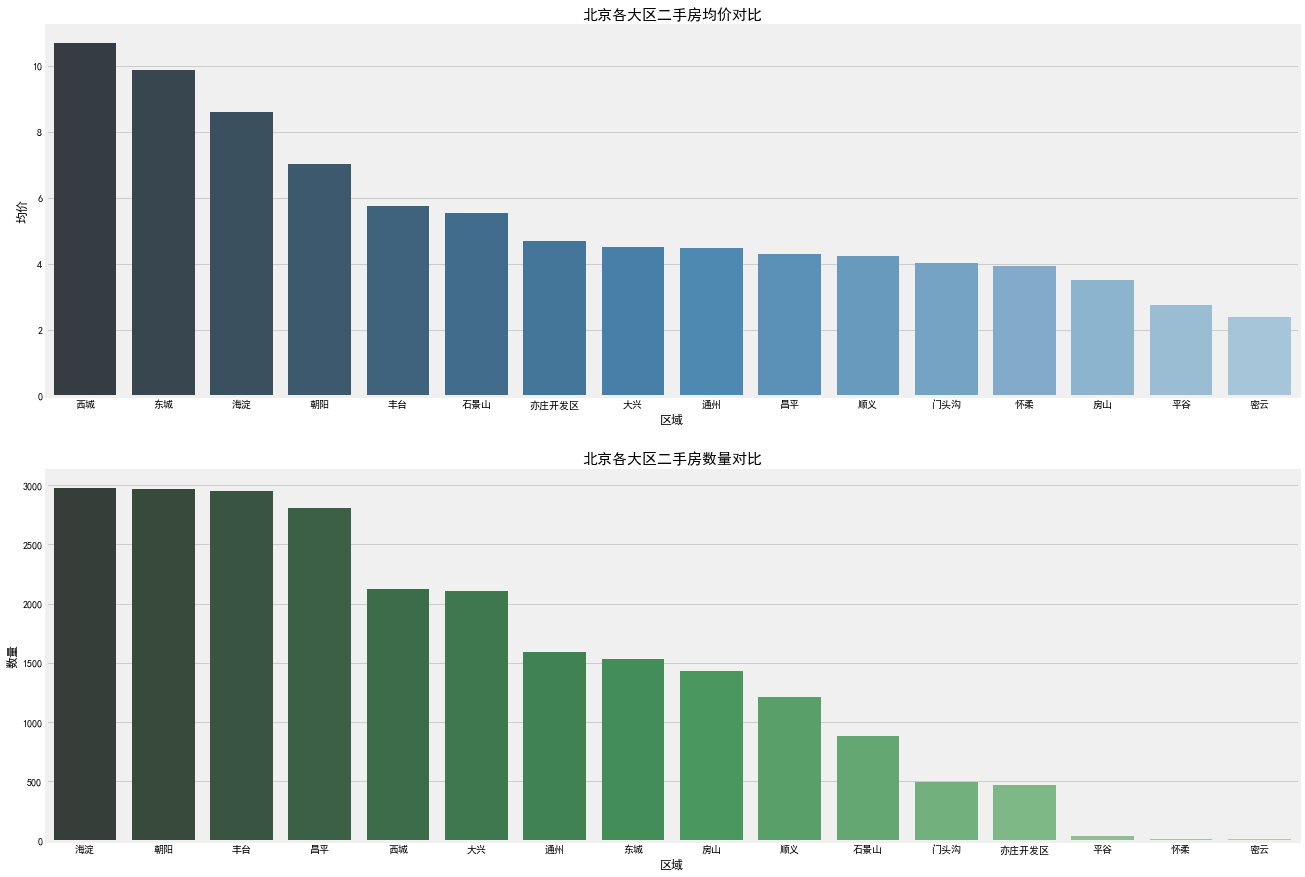

In [292]:
# 各个区的二手房数量和房价
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

f,[ax1,ax2] = plt.subplots(2,1,figsize=(20,15))

sns.barplot(x='Region', y='PerPrice', palette='Blues_d', data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区二手房均价对比', fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('均价')

sns.barplot(x='Region', y='Price', palette='Greens_d', data=df_house_count, ax=ax2)
ax2.set_title('北京各大区二手房数量对比', fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

plt.show()

## 4、Renovation特征

In [293]:
# 查看Renovation特征
df['Renovation'].value_counts()

精装    11329
简装     8492
其他     3235
毛坯      572
Name: Renovation, dtype: int64

C:\Users\85053\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


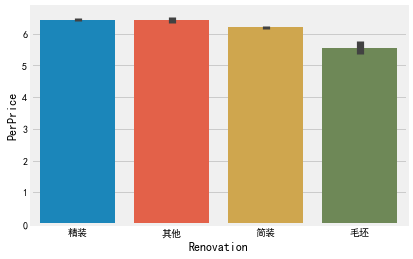

In [294]:
# 查看Renovation与Price的关系
sns.barplot(x='Renovation', y='PerPrice', data=df)

## 5、Elevator特征

In [295]:
# Elevator特征分析
# 查看Elevator缺失情况，及分布情况
df['Elevator'].value_counts(dropna=False)

有电梯    9333
NaN    8218
无电梯    6077
Name: Elevator, dtype: int64

In [296]:
# 考虑填补缺失值
# 看一下有电梯与层数的关系
df.loc[df['Elevator']=='有电梯']['Floor'].value_counts()

18    1031
16     701
24     583
14     514
15     492
12     471
11     465
21     432
9      418
22     413
20     395
28     343
26     309
10     284
27     280
17     271
13     256
25     245
19     245
6      235
23     193
8      174
7      149
29     111
30      80
32      62
31      43
4       38
5       37
33      23
34      12
35       8
36       8
3        7
40       3
2        1
57       1
Name: Floor, dtype: int64

In [297]:
# 查看一下无电梯的层数
df.loc[df['Elevator']=='无电梯']['Floor'].value_counts()


6     4686
5      599
7      430
4      246
3       65
14      13
9        8
11       6
12       4
8        3
16       3
2        3
18       3
21       2
15       2
10       2
1        1
19       1
Name: Floor, dtype: int64

In [298]:
# 根据   Floor<=6 无电梯   来填补缺失值
df.loc[(df['Elevator'].isnull()) & (df['Floor']<=6), 'Elevator'] = '无电梯'
# df.loc[(df['Elevator'].isnull()) & (df['Floor']<=6)][:,'Elevator'] = '无电梯'
df.loc[(df['Elevator'].isnull()) & (df['Floor']>6), 'Elevator'] = '有电梯'

df['Elevator'].value_counts(dropna=False)

有电梯    14011
无电梯     9617
Name: Elevator, dtype: int64

C:\Users\85053\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


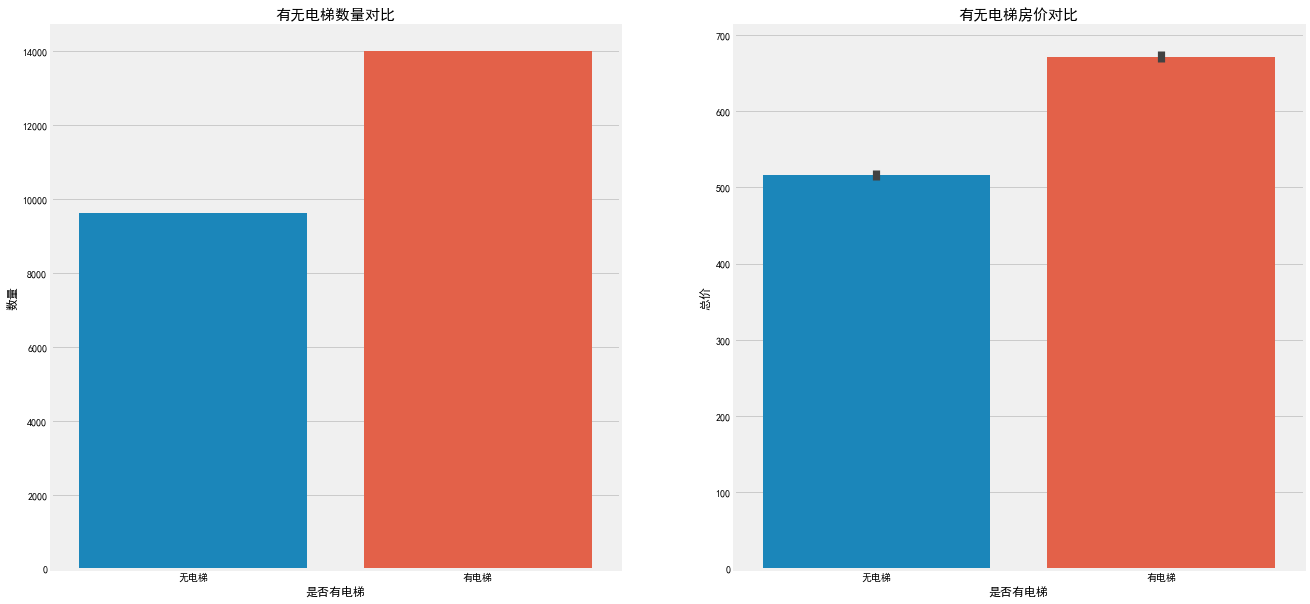

In [299]:
# 查看一下有无电梯的房屋数量和价格分布
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,10))

sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比', fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')

sns.barplot(x='Elevator', y='Price', data=df, ax=ax2)
ax2.set_title('有无电梯房价对比', fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')

plt.show()


## 6、Year特征

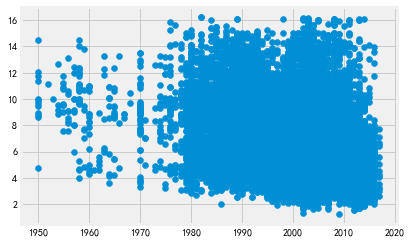

In [300]:
# Year特征分析
# 查看年份和单价的关系
plt.scatter(df['Year'], df['PerPrice'])

In [301]:
# 将年份分下箱
df['Year']
pd.cut(df['Year'], [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]).value_counts()
pd.cut(df['Year'], [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], labels=[0,1,2,3,4,5,6]).value_counts()
df['Year'] = pd.cut(df['Year'], [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], labels=[0,1,2,3,4,5,6])
df['Year'].value_counts()

5    11536
4     5935
6     3132
3     2370
2      475
1       86
0       82
Name: Year, dtype: int64

## 7、Direction特征

In [302]:
# Direction特征
df['Direction'].value_counts()

南北        11373
南          2844
东西         1403
东南         1345
西南         1122
东           934
西           889
西北          765
东北          676
北           610
东南北         467
南西北         370
南西          164
东西北         141
东南西         134
西南北         124
东南西北         84
西南东北         24
南东北          19
东南西南         15
东南南          14
西南西北         10
东东南          10
西东北          10
东西南           9
南西南           9
东南东北          8
西南西           6
东南南北          5
南西东北          3
东西南北          3
南西南北          2
南西西北          2
南西北北          2
南西南西          2
西西南           2
西北北           2
西西北           2
东北东北          2
东东北           2
西北东北          2
南东            2
南北西           1
西南西北东北        1
东南南西北         1
东东南南          1
北南            1
东南西南东北        1
东南西南北         1
东南西北北         1
东西北北          1
东南西北东北        1
西南西北北         1
南北东           1
东南北西          1
南北东北          1
北西            1
东西北东北         1
Name: Direction, dtype: int64

In [303]:
# 先去掉重复的
def diff(x):
    return ''.join(set(x))
df['Direction'] = df['Direction'].apply(diff)
df['Direction'].value_counts()

北南      11373
南        2844
西东       1403
南东       1370
西南       1305
东         934
西         889
西北        770
北东        680
北         610
西北南       512
北南东       480
西南东       158
西北东       153
西北南东       93
西北东南       28
北东南        21
东南          2
西东北         2
南北          1
Name: Direction, dtype: int64

In [304]:
# 调整顺序
def str_sort(s):
#     s = list(s)
#     s.sort()
#     s = ''.join(s)
#     return(s)
    return "".join((lambda x:(x.sort(),x)[1])(list(s)))
df['Direction'] = df['Direction'].apply(str_sort)
df['Direction'].value_counts()

北南      11374
南        2844
东西       1403
东南       1372
南西       1305
东         934
西         889
北西        770
东北        680
北         610
北南西       512
东北南       501
东南西       158
东北西       155
东北南西      121
Name: Direction, dtype: int64

In [307]:
df.head()

,Direction,District,Elevator,Floor,Garden,Price,Region,Renovation,Size,Year,PerPrice,室
0,东西,灯市口,无电梯,6,锡拉胡同21号院,780.0,东城,精装,75.0,3,10.400000,3
1,北南,东单,无电梯,6,东华门大街,705.0,东城,精装,60.0,3,11.750000,2
2,南西,崇文门,有电梯,16,新世界中心,1400.0,东城,其他,210.0,4,6.666667,3
3,南,崇文门,有电梯,7,兴隆都市馨园,420.0,东城,精装,39.0,5,10.769231,1
4,南,陶然亭,有电梯,19,中海紫御公馆,998.0,东城,精装,90.0,5,11.088889,2


## 8、District特征

In [306]:
df['District'].value_counts()

长阳       703
回龙观      620
天通苑      576
良乡       552
枣园       466
亦庄       409
广安门      370
望京       366
北七家      361
鲁谷       359
西红门      331
顺义城      328
后沙峪      290
马甸       276
旧宫       272
清河       265
顺义其它     260
玉泉营      241
黄村中      232
东直门      223
鼓楼大街     223
立水桥      220
马家堡      216
科技园区     206
大兴其它     204
苹果园      197
西三旗      197
广渠门      192
武夷花园     189
青塔       183
        ... 
西四        23
建国门外      22
城关        21
CBD       20
车公庄       20
万寿路       20
北太平庄      20
地安门       19
西山        19
天竺        19
大山子       17
圆明园       16
颐和园       16
怀柔        15
金宝街       14
厂洼        13
北工大       13
房山其它      13
东大桥       12
密云其它      12
十里河       10
朝阳其它      10
大兴开发区     10
海淀其它       8
东单         8
韩村河        7
十八里店       7
三里屯        7
前门         6
李桥         5
Name: District, Length: 232, dtype: int64

In [312]:
# District和单价的关系
df_District_mean = df.groupby('District')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
df_District_mean

,District,PerPrice
0,金融街,13.951964
1,德胜门,13.439168
2,地安门,13.246682
3,万柳,13.156542
4,交道口,13.123041
5,西四,12.902443
6,西单,12.614585
7,马甸,12.470080
8,宣武门,12.317734
9,东单,12.235686


## 9、Garden特征

In [313]:
df['Garden'].value_counts()

远洋山水         102
荣丰2008        97
首邑溪谷          75
加州水郡三期        63
金隅万科城         61
东方太阳城         58
天通苑东一区        54
天通苑北一区        53
远见名苑          53
天通苑中苑         52
中粮祥云国际生活区     50
天通苑北二区        49
枣园小区          48
鸿坤理想城礼域府      46
龙湖时代天街        45
瑞雪春堂          45
朗琴园           43
天通西苑三区        43
新龙城           42
溪城家园          42
林肯公园          41
裕中西里          40
中建国际港         39
华业东方玫瑰        39
天通西苑二区        39
三环新城7号院       37
海特花园小区        37
新安里           36
天通苑北三区        36
保利西山林语        35
            ... 
京溪小区           1
华远裘马四季         1
国英一号           1
中关村南大街48号      1
海户屯            1
新村一里           1
菊源里            1
风景线            1
颐源居一期          1
威尼斯花园F区        1
车公庄中里          1
燕归宁馨园          1
亮丽园            1
莲怡园一区          1
右安门西街          1
中海金鑫阁          1
滨河楼小区          1
顺欣嘉园           1
天坛家具城          1
中国银行宿舍         1
苏园西区           1
毛条小区           1
甘雨胡同2号院        1
电信宿舍           1
机场南路东里         1
帅府园            1
朝阳公园西里南区       1
禄米仓胡同         

In [314]:
# Garden和单价的关系
df_Garden_mean = df.groupby('Garden')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
df_Garden_mean

,Garden,PerPrice
0,禄米仓胡同71号院,16.230769
1,丰汇园小区,16.092715
2,鲍家街,16.081081
3,普渡寺后巷,16.073529
4,光大水墨风景,15.994998
5,阳光丽景,15.563553
6,中信禧园,15.360655
7,西城晶华,15.335521
8,红玺台,15.295810
9,东罗圈胡同,15.232558


# 特征相关性分析

In [315]:
df.corr()

,Floor,Price,Size,PerPrice,室
Floor,1.000000,0.116589,0.012198,0.099120,-0.146806
Price,0.116589,1.000000,0.690668,0.541377,0.471837
Size,0.012198,0.690668,1.000000,-0.128724,0.725107
PerPrice,0.099120,0.541377,-0.128724,1.000000,-0.117271
室,-0.146806,0.471837,0.725107,-0.117271,1.000000


# one_hot

In [318]:
def set_dummies(data, colnames):
    for col in colnames:
        data[col] = data[col].astype('category') #
        dummy = pd.get_dummies(data[col])
        dummy = dummy.add_prefix('{}#'.format(col)) # 为特征加上前缀
        data.drop(col, axis=1, inplace=True)
        data = data.join(dummy)
    return data

df = set_dummies(df, ['Direction','District','Elevator','Garden','Region','Renovation','Year','室'])
df.head()     

,Floor,Price,Size,PerPrice,Direction#东,Direction#东北,Direction#东北南,Direction#东北南西,Direction#东北西,Direction#东南,...,Year#3,Year#4,Year#5,Year#6,室#1,室#2,室#3,室#4,室#5,室#6
0,6,780.0,75.0,10.400000,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,6,705.0,60.0,11.750000,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,16,1400.0,210.0,6.666667,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,7,420.0,39.0,10.769231,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,19,998.0,90.0,11.088889,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# PCA降维

In [319]:
# 先将x,y划分一下
y = df['Price']
X = df.drop(['Price'], axis=1)
print(X.shape)
y[:5]

(23628, 4805)


0     780.0
1     705.0
2    1400.0
3     420.0
4     998.0
Name: Price, dtype: float64

In [321]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca[:5])

(23628, 300)
[[-2.39345294e+01 -6.59866664e+00  4.23644595e+00 ... -9.99884817e-04
  -5.85634917e-03  4.93950202e-03]
 [-3.89465083e+01 -6.54332995e+00  5.43092149e+00 ... -7.48054319e-03
   2.08846957e-03 -1.69728580e-02]
 [ 1.11105406e+02  3.07437702e+00  1.07109983e+00 ...  1.70106760e-02
   2.41203468e-03  2.20290226e-02]
 [-5.99336628e+01 -5.39128152e+00  4.27664767e+00 ...  3.82001456e-02
   2.49140685e-02  4.59785839e-02]
 [-8.91634816e+00  6.47867414e+00  4.44977925e+00 ... -1.01765692e-02
   9.77906680e-03 -9.59961393e-04]]
